In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('/content/Top 2000 Companies Financial Data 2024.csv')
df

,Unnamed: 0,Name,Country,Sales,Profit,Assets,Market Value
0,0,JPMorganChase,United States,$252.9 B,$50 B,"$4,090.7 B",$588.1 B
1,1,Berkshire Hathaway,United States,$369 B,$73.4 B,"$1,070 B",$899.1 B
2,2,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,$489.1 B,$116.9 B,$661.5 B,"$1,919.3 B"
3,3,ICBC,China,$223.8 B,$50.4 B,"$6,586 B",$215.2 B
4,4,Bank of America,United States,$183.3 B,$25 B,"$3,273.8 B",$307.3 B
...,...,...,...,...,...,...,...
1996,1996,Sichuan Chuantou Energy,China,$201 M,$632.7 M,$8.6 B,$11.3 B
1997,1997,Vietnam Prosperity Joint-sock Commercial Bank,Vietnam,$3.9 B,$460.2 M,$33.2 B,$6 B
1998,1998,Adient,United States,$15.2 B,$158 M,$9.3 B,$2.6 B
1999,1999,CapitaLand Investment,Singapore,$2.2 B,$134.8 M,$25.9 B,$10 B


**Basic Info about the dataset**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    2001 non-null   int64 
 1   Name          2001 non-null   object
 2   Country       2001 non-null   object
 3   Sales         2001 non-null   object
 4   Profit        2001 non-null   object
 5   Assets        2001 non-null   object
 6   Market Value  2001 non-null   object
dtypes: int64(1), object(6)
memory usage: 109.6+ KB


In [6]:
df.head()

,Unnamed: 0,Name,Country,Sales,Profit,Assets,Market Value
0,0,JPMorganChase,United States,$252.9 B,$50 B,"$4,090.7 B",$588.1 B
1,1,Berkshire Hathaway,United States,$369 B,$73.4 B,"$1,070 B",$899.1 B
2,2,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,$489.1 B,$116.9 B,$661.5 B,"$1,919.3 B"
3,3,ICBC,China,$223.8 B,$50.4 B,"$6,586 B",$215.2 B
4,4,Bank of America,United States,$183.3 B,$25 B,"$3,273.8 B",$307.3 B


**Cleaning the financial data**

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Function to clean financial data
def clean_financial_data(value):
    if isinstance(value, str):
        value = value.replace("$", "").replace("B", "").replace(",", "").strip()
        try:
            return float(value)  # Convert to float
        except ValueError:
            return np.nan  # Handle conversion issues
    return value

# Apply cleaning function to numerical columns
for col in ["Sales", "Profit", "Assets", "Market Value"]:
    df[col] = df[col].apply(clean_financial_data)

# Drop rows with missing values after conversion
df.dropna(subset=["Sales", "Profit", "Assets", "Market Value"], inplace=True)

**1)Bar Graph-Top 10 companies by market values**

<ipython-input-8-e96a6e996e95>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Market Value", y="Name", data=top_10_companies, palette="viridis")


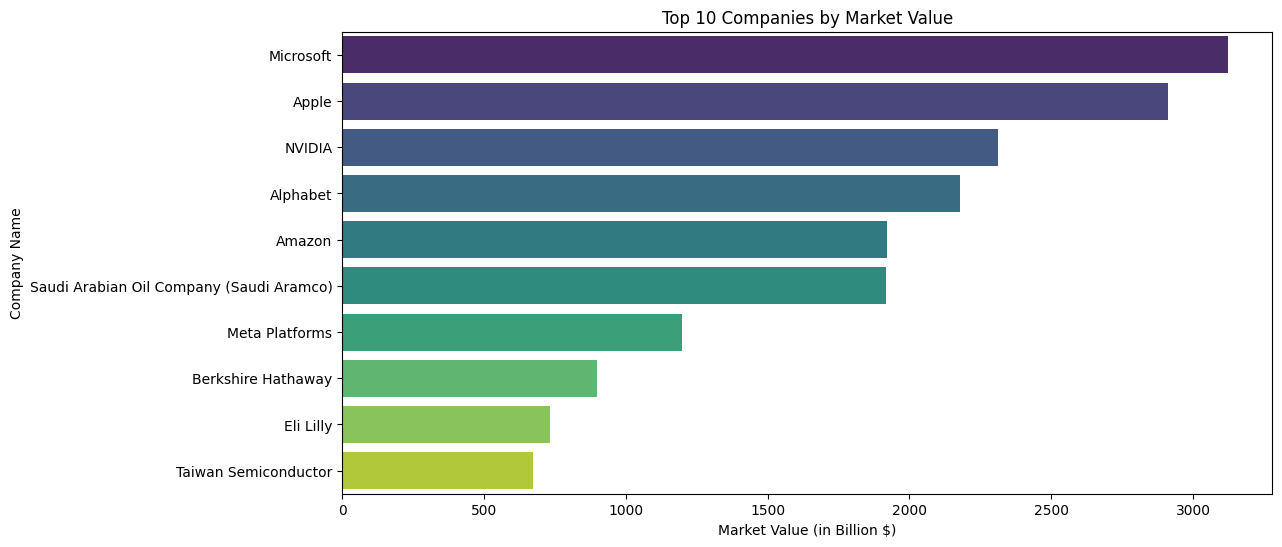

In [8]:
top_10_companies = df.nlargest(10, "Market Value")


plt.figure(figsize=(12, 6))
sns.barplot(x="Market Value", y="Name", data=top_10_companies, palette="viridis")
plt.xlabel("Market Value (in Billion $)")
plt.ylabel("Company Name")
plt.title("Top 10 Companies by Market Value")
plt.show()

**2)Heatmap-Correlation between financial metrics**

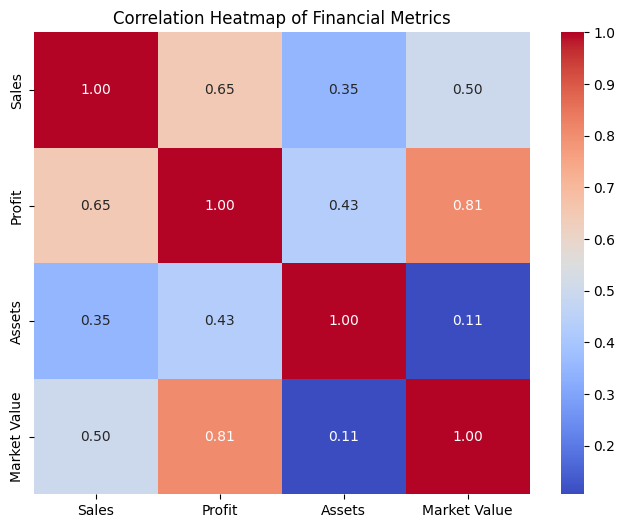

In [9]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[["Sales", "Profit", "Assets", "Market Value"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Financial Metrics")
plt.show()

**3)Scatter Plot-Sales vs Market Value**

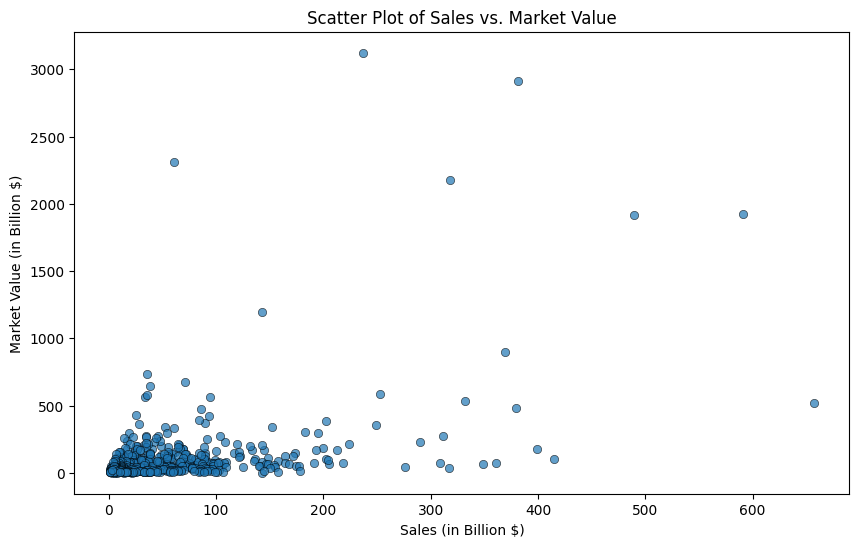

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Sales", y="Market Value", data=df, alpha=0.7, edgecolor="black")
plt.xlabel("Sales (in Billion $)")
plt.ylabel("Market Value (in Billion $)")
plt.title("Scatter Plot of Sales vs. Market Value")
plt.show()

**4)Histogram-Distribution of Profits**

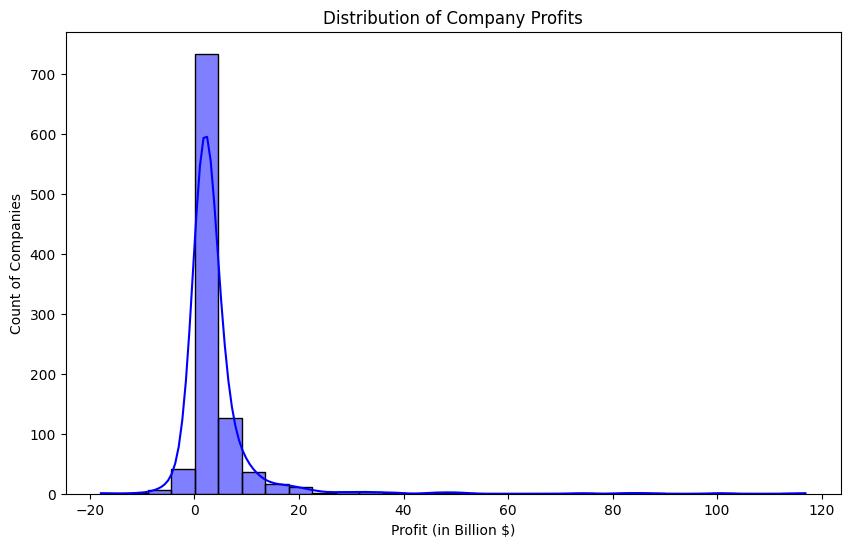

In [12]:
plt.figure(figsize=(10,6))
sns.histplot(df["Profit"], bins=30, kde=True, color="blue")
plt.xlabel("Profit (in Billion $)")
plt.ylabel("Count of Companies")
plt.title("Distribution of Company Profits")
plt.show()

 **5)Box Plot - Profit Distribution by Country (Top 10 Countries by Count)**

<ipython-input-13-d1f5ed980059>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Country",y="Profit",data=df_filtered,palette="Set2")


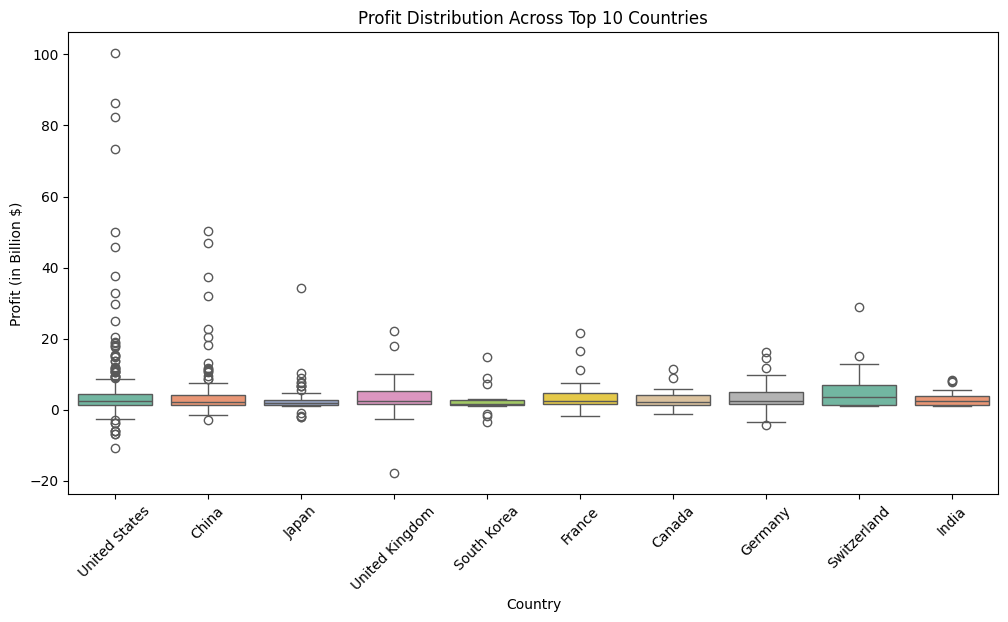

In [13]:
top_countries=df["Country"].value_counts().nlargest(10).index
df_filtered=df[df["Country"].isin(top_countries)]

plt.figure(figsize=(12,6))
sns.boxplot(x="Country",y="Profit",data=df_filtered,palette="Set2")
plt.xticks(rotation=45)
plt.xlabel("Country")
plt.ylabel("Profit (in Billion $)")
plt.title("Profit Distribution Across Top 10 Countries")
plt.show()

**6)Pie Chart-Market Share by Top 10 Countries**

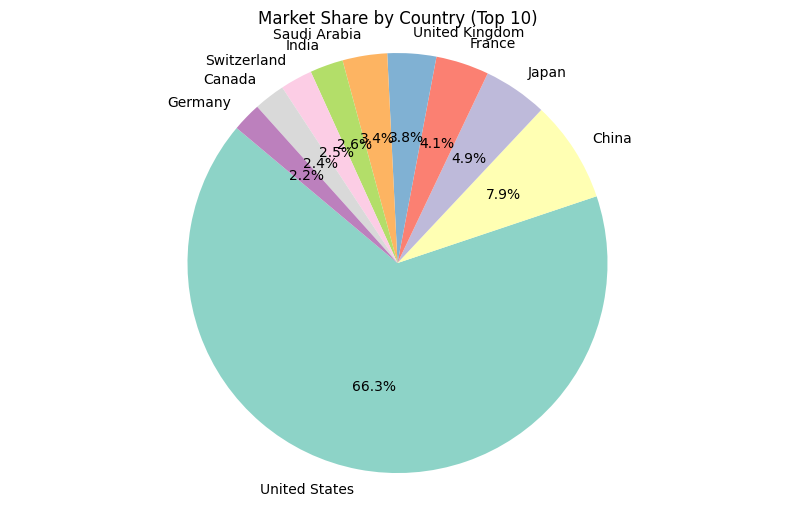

In [14]:
# Aggregate market value by country for the top 10 countries
top_countries_market = df.groupby("Country")["Market Value"].sum().nlargest(10)

# Pie Chart - Market Share by Country
plt.figure(figsize=(10, 6))
plt.pie(top_countries_market, labels=top_countries_market.index, autopct='%1.1f%%',
        colors=sns.color_palette("Set3", len(top_countries_market)), startangle=140)
plt.title("Market Share by Country (Top 10)")
plt.axis('equal')  # Ensures the pie chart is circular
plt.show()
